<center><h1 style='color:green'>Amazon Music Instruments Reviews </h1>

In [1]:
import pyforest

# Content


This file has reviewer ID , User ID, Reviewer Name, Reviewer text, helpful, Summary(obtained from Reviewer text),Overall Rating on a scale 5, Review time
Description of columns in the file:

reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B<br>
asin - ID of the product, e.g. 0000013714<br>
reviewerName - name of the reviewer<br>
helpful - helpfulness rating of the review, e.g. 2/3<br>
reviewText - text of the review<br>
overall - rating of the product<br>
summary - summary of the review<br><br>
unixReviewTime - time of the review (unix time)<br>
reviewTime - time of the review (raw)<br>


# Tasks

You have to perform Sentimental Analysis for this data. Help the organization to understand better about their customer feedback's So that they can concentrate on those issues customer's are facing. Build the model which has highest accuracy in classifying the feedback as positive,Negative and neutral.<br>
Task :1<br>
You have to categorize opinions expressed in feedback forums<br>
Task :2<br>
You have to classify individual comments/reviews and you have to determine overall rating based on individual
comments/reviews.


# Inspiration  



This is the Problem Statement given by ISRO to classify the customer comments. This would be helpful for the organization to understand Customer feedbacks.

In [2]:
df = pd.read_csv('Musical_instruments_reviews.csv')
df.head(2)

<IPython.core.display.Javascript object>

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"


In [3]:
df.shape

(10261, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
reviewerID        10261 non-null object
asin              10261 non-null object
reviewerName      10234 non-null object
helpful           10261 non-null object
reviewText        10254 non-null object
overall           10261 non-null float64
summary           10261 non-null object
unixReviewTime    10261 non-null int64
reviewTime        10261 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [5]:
df.isna().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(10227, 9)

In [8]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


# Data Cleaning

In [9]:
df.drop(['reviewerID','asin','reviewerName','helpful','unixReviewTime','reviewTime'],inplace=True,axis=1)
df.shape

(10227, 3)

In [10]:
df.head(2)

,reviewText,overall,summary
0,"Not much to write about here, but it does exac...",5.0,good
1,The product does exactly as it should and is q...,5.0,Jake


In [11]:
df.to_csv('final_set.csv',index=False)

In [12]:
df = pd.read_csv('final_set.csv')
df.head(4)

<IPython.core.display.Javascript object>

,reviewText,overall,summary
0,"Not much to write about here, but it does exac...",5.0,good
1,The product does exactly as it should and is q...,5.0,Jake
2,The primary job of this device is to block the...,5.0,It Does The Job Well
3,Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY


In [13]:
df['reviewText'][1000]

'The Evans Pedal Patch will work for you great.. It will keep your mass drum head from gettingworn and nasty..  I cheap buy and it works excellent..'

In [14]:
df.iloc[1000]

reviewText    The Evans Pedal Patch will work for you great....
overall                                                       5
summary                                A Must for a Double Kick
Name: 1000, dtype: object

In [15]:
df['overall'].value_counts()

5.0    6912
4.0    2079
3.0     771
2.0     249
1.0     216
Name: overall, dtype: int64

In [16]:
df[df['overall']>3].shape

(8991, 3)

In [17]:
df[df['overall']<=3].shape

(1236, 3)

In [18]:
df.shape

(10227, 3)

### Handling categorical variables

In [19]:
def sentiment(x):
    if x>3:
        return 1
    else:
        return 0

In [20]:
df['Sentiment'] = df['overall'].apply(sentiment)

In [21]:
df.head(2)

,reviewText,overall,summary,Sentiment
0,"Not much to write about here, but it does exac...",5.0,good,1
1,The product does exactly as it should and is q...,5.0,Jake,1


In [22]:
df['Final_text']  = df['reviewText']+" "+df['summary']

In [23]:
df.head(3)

,reviewText,overall,summary,Sentiment,Final_text
0,"Not much to write about here, but it does exac...",5.0,good,1,"Not much to write about here, but it does exac..."
1,The product does exactly as it should and is q...,5.0,Jake,1,The product does exactly as it should and is q...
2,The primary job of this device is to block the...,5.0,It Does The Job Well,1,The primary job of this device is to block the...


In [24]:
df.drop(['reviewText','overall','summary'],axis=1,inplace=True)

In [25]:
df.to_csv('clean_data.csv',index=False)

In [26]:
df = pd.read_csv('clean_data.csv')

<IPython.core.display.Javascript object>

In [27]:
df.head(2)

,Sentiment,Final_text
0,1,"Not much to write about here, but it does exac..."
1,1,The product does exactly as it should and is q...


# Text Preprocessing.
Now our data requires some preprocessing before we go on further with analysis and making the prediction model.


<li>Begin by removing the html tags<br>
<li>Remove any punctuations or limited set of special characters like , or . or # etc.<br>
<li>Check if the word is made up of english letters and is not alpha-numeric<br>
<li>Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)<br>
<li>Convert the word to lowercase<br>
<li>Remove Stopwords<br>
<li>Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)<br>
After which we collect the words used to describe positive and negative reviews<br>

In [28]:
import re
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [29]:
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup


#https://snowballstem.org/

#### Stemming

In [30]:
 snst = nltk.stem.SnowballStemmer('english')

In [31]:
snst.stem('failure')

'failur'

In [32]:
snst.stem('reviews')

'review'

In [33]:
df['Final_text'][7000]

"I have one of these for a Lanikai tenor, and one for a Stagg soprano. The soprano one fits great, even though it's a different brand. Perfect. Fits great"

In [34]:
snst.stem(df['Final_text'][7000])

"i have one of these for a lanikai tenor, and one for a stagg soprano. the soprano one fits great, even though it's a different brand. perfect. fits great"

In [35]:
def stemming(sentance):
       return snst.stem(sentance)

In [36]:
text = df['Final_text'].values

#### Word Completion

In [37]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase =  re.sub(r"http\S+", "", phrase)
    return phrase

#### Stopwords

In [38]:

# we are removing the words from the stop words list: 'no', 'nor', 'not'
# <br /><br /> ==> after the above steps, we are getting "br br"
# we are including them into stop words list
# instead of <br /> if we have <br/> these tags would have revmoved in the 1st step


stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [39]:
# Combining all the above functions

    
from tqdm import tqdm

preprocessed_reviews = []

def preprocess_text(text):
        # tqdm is for printing the status bar
        for sentance in tqdm(text):
            sentance = re.sub(r"http\S+", "", sentance)
            sentance = BeautifulSoup(sentance, 'lxml').get_text()
            sentance = decontracted(sentance)
            sentance = re.sub("\S*\d\S*", "", sentance).strip()
            sentance = re.sub('[^A-Za-z]+', ' ', sentance)
            sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords) 
            sentance = stemming(sentance)
            
            preprocessed_reviews.append(sentance.strip())

        return preprocessed_reviews

In [40]:
preprocess_text(text)

100%|███████████████████████████████████████████████████████| 10227/10227 [00:14<00:00, 697.39it/s]


['not much write exactly supposed filters pop sounds recordings much crisp one lowest prices pop filters amazon might well buy honestly work despite pricing good',
 'product exactly quite affordable not realized double screened arrived even better expected added bonus one screens carries small hint smell old grape candy used buy reminiscent sake cannot stop putting pop filter next nose smelling recording dif needed pop filter work well expensive ones may even come pleasing aroma like mine buy product jak',
 'primary job device block breath would otherwise produce popping sound allowing voice pass no noticeable reduction volume high frequencies double cloth filter blocks pops lets voice no coloration metal clamp mount attaches mike stand secure enough keep attached goose neck needs little coaxing stay put job wel',
 'nice windscreen protects mxl mic prevents pops thing gooseneck marginally able hold screen position requires careful positioning clamp avoid sagging good windscreen money',

# Featurization

In [41]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# BOW

In [42]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(preprocessed_reviews)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*30)

final_counts = count_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

some feature names  ['aa', 'aaa', 'aaaand', 'ab', 'aback', 'abalone', 'abandon', 'abbe', 'abcd', 'abehringer']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (10227, 19543)
the number of unique words  19543


In [87]:
x = final_counts
print(type(x))
print(x.shape)
x = x.toarray()
print(x.shape)
print(type(x))

y =np.array( df['Sentiment'])
print(y.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(10227, 19543)
(10227, 19543)
<class 'numpy.ndarray'>


<IPython.core.display.Javascript object>

(10227,)


## Data spliting

In [88]:
from sklearn.model_selection import StratifiedKFold

In [89]:
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(x, y)

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
for train_index, test_index in skf.split(x, y):
  #  print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [90]:
X_train.shape

(5114, 19543)

In [91]:
X_test.shape

(5113, 19543)

## Model Building

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [93]:
lr = LogisticRegression(class_weight='balanced')

In [94]:
def Binary_classifier(estimator,X_train,X_test,y_train,y_test):
    estimator.fit(X_train,y_train)
    y_pred = estimator.predict(X_test)
    y_train_pred = estimator.predict(X_train)
    
    test_acc = accuracy_score(y_test,y_pred)
    train_acc = accuracy_score(y_train,y_train_pred)
    
    print('Train Accuracy: {}'.format(train_acc))
    print('Test Accuracy: {}'.format(test_acc))
    
    print(30*'====')
    cm = confusion_matrix(y_test,y_pred)
    cf = pd.DataFrame(cm,columns=['Negative','Positive'],index=['Negative','Positive'])
    sns.heatmap(cf,annot=True,fmt='d',cbar=False,cmap='viridis')
    plt.show()
    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Accuracy: 0.9939382088384826
Test Accuracy: 0.8474476823782515


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

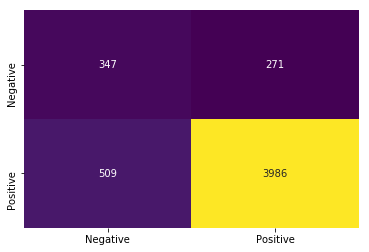

In [95]:
Binary_classifier(lr,X_train,X_test,y_train,y_test)

# Tuning

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
grid_params ={
    'C':[0.0001,0.001,0.01,1,10,100,1000],
    'penalty':['l1','l2'],
}

In [54]:
grid_lr = GridSearchCV(lr,param_grid=grid_params,cv=5,scoring='accuracy')

In [56]:
grid_lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0001, 0.001, 0.01, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [57]:
grid_lr.best_estimator_

LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [58]:
grid_lr.best_score_

0.8640985529917873

In [59]:
grid_lr.best_params_

{'C': 1, 'penalty': 'l2'}

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Accuracy: 0.9939382088384826
Test Accuracy: 0.8474476823782515


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

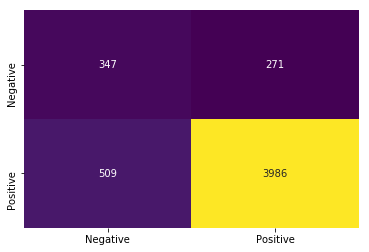

In [60]:
f_lr = LogisticRegression(C= 1,penalty='l2',class_weight='balanced')
Binary_classifier(f_lr,X_train,X_test,y_train,y_test)

# TF-IDF

In [61]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(preprocessed_reviews)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['aa', 'aaa', 'aaa batteries', 'ability', 'able', 'able find', 'able get', 'able play', 'able use', 'ableton']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (10227, 7712)
the number of unique words including both unigrams and bigrams  7712


In [62]:
x = final_tf_idf
print(type(x))
print(x.shape)
x = x.toarray()
print(x.shape)
print(type(x))

y =np.array( df['Sentiment'])
print(y.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(10227, 7712)
(10227, 7712)
<class 'numpy.ndarray'>


<IPython.core.display.Javascript object>

(10227,)


In [63]:
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(x, y)

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
for train_index, test_index in skf.split(x, y):
  #  print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [64]:
X_train.shape

(5114, 7712)

In [65]:
X_test.shape

(5113, 7712)

In [66]:
lr = LogisticRegression(class_weight='balanced')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Accuracy: 0.9325381306218224
Test Accuracy: 0.838451007236456


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

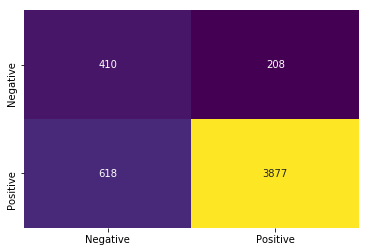

In [67]:
Binary_classifier(lr,X_train,X_test,y_train,y_test)

# Tuning

In [68]:
grid_lr = GridSearchCV(lr,param_grid=grid_params,cv=5,scoring='accuracy')

In [69]:
grid_lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0001, 0.001, 0.01, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [70]:
grid_lr.best_score_

0.8764176769651936

In [71]:
grid_lr.best_params_

{'C': 100, 'penalty': 'l2'}

In [72]:
lr_tf = LogisticRegression(C=100,penalty='l2')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Accuracy: 1.0
Test Accuracy: 0.8953647565030315


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

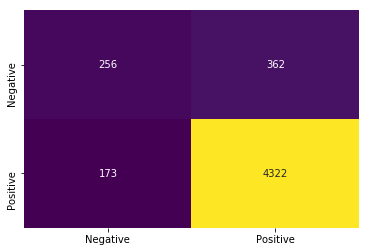

In [73]:
Binary_classifier(lr_tf,X_train,X_test,y_train,y_test)

# Model Predictions

In [74]:
text = 'worst product, waste of my money'
vectorizer=tf_idf_vect
data = vectorizer.transform(np.array([text])).toarray()
data

review_sentiment = lr_tf.predict(data)
review_sentiment[0]

<IPython.core.display.Javascript object>

0

In [75]:
def prediction(vectorizor,text,estimator):
    data = vectorizer.transform(np.array([text])).toarray()
    review_sentiment = estimator.predict(data)
    if review_sentiment[0] == 1:
        return 'Positive'
    else:
        return 'Negative'
    

# TF-IDF prediction

In [76]:
vectorizer = tf_idf_vect
text = 'This is really a good product, i fully satisfied..!'
estimator = lr_tf

prediction(vectorizer,text,estimator)

<IPython.core.display.Javascript object>

'Positive'

In [77]:
vectorizer = tf_idf_vect
text = 'worst product, waste of my money'
estimator = lr_tf

prediction(vectorizer,text,estimator)

<IPython.core.display.Javascript object>

'Negative'

# BOW prediction

In [78]:
vectorizer = count_vect
text = 'This is really a good product, i fully satisfied..!'
estimator = f_lr

prediction(vectorizer,text,estimator)

<IPython.core.display.Javascript object>

'Positive'

In [79]:
vectorizer = count_vect
text = 'worst product, waste of my money'
estimator = f_lr

prediction(vectorizer,text,estimator)

<IPython.core.display.Javascript object>

'Negative'

# Task -1:

In [80]:
df.head(2)

,Sentiment,Final_text
0,1,"Not much to write about here, but it does exac..."
1,1,The product does exactly as it should and is q...


In [81]:
Positive = df[df['Sentiment'] ==1]['Final_text']
Negative = df[df['Sentiment'] ==0]['Final_text']

In [82]:
Positive.shape

(8991,)

In [83]:
Negative.shape

(1236,)

In [84]:
Positive[1]

"The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :] Jake"

# Text Reviews with Good Ratings

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

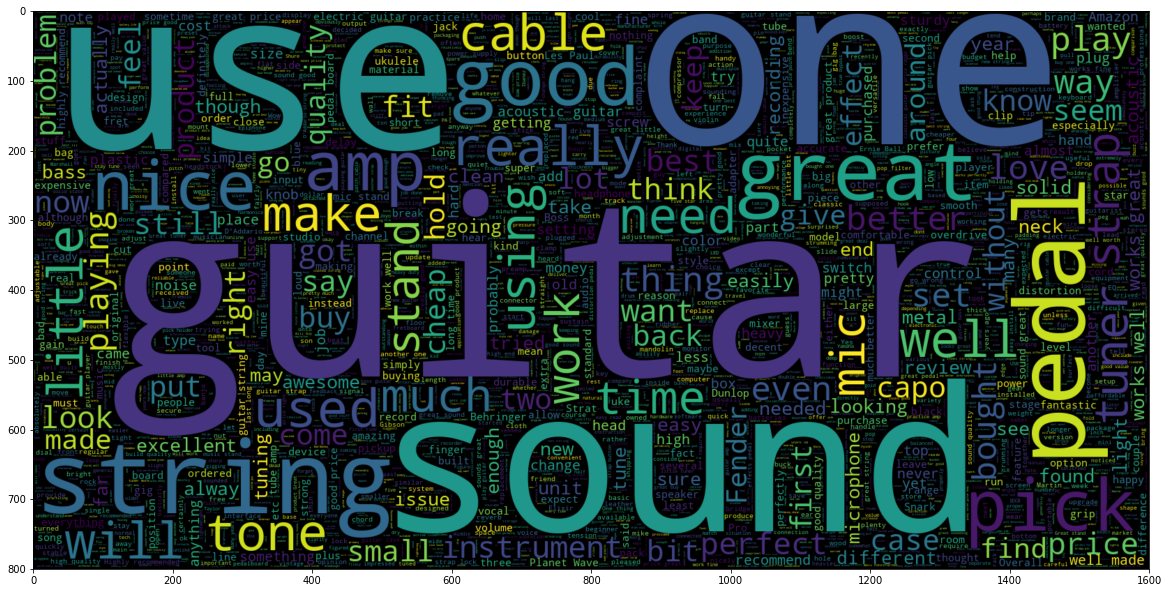

In [85]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(" ".join(Positive))
plt.imshow(wc,interpolation = 'bilinear')
plt.show()

# Text Reviews with Poor Ratings

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

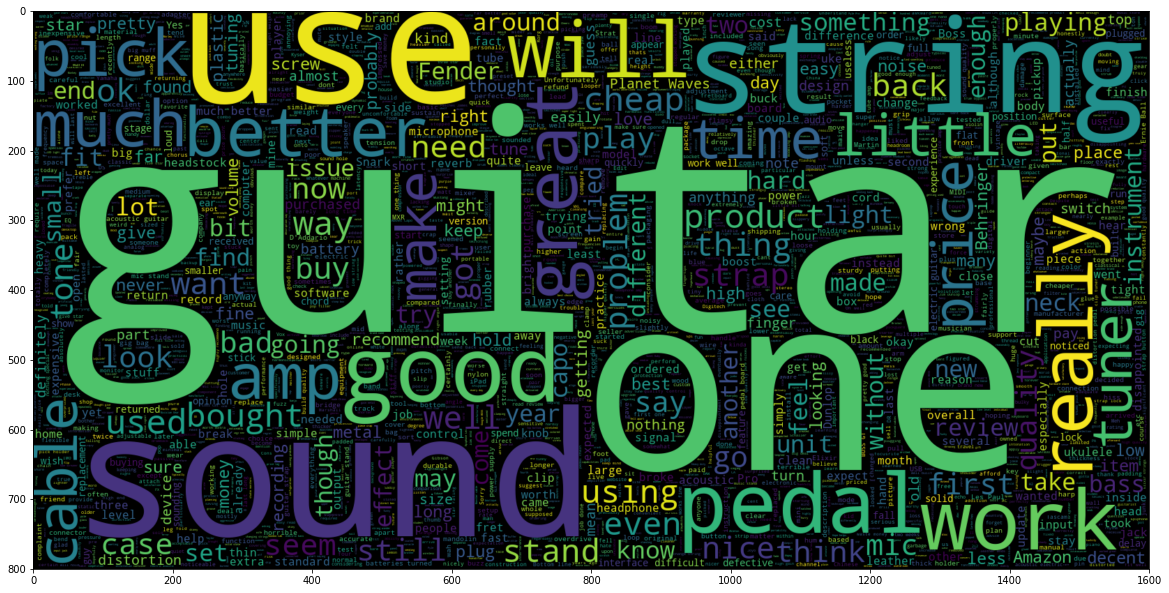

In [86]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(" ".join(Negative))
plt.imshow(wc,interpolation = 'bilinear')
plt.show()